In [37]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries for linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Saving model
import joblib 

In [38]:
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. Regression Practice Projects - ED & ML\Salary & Experience\Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


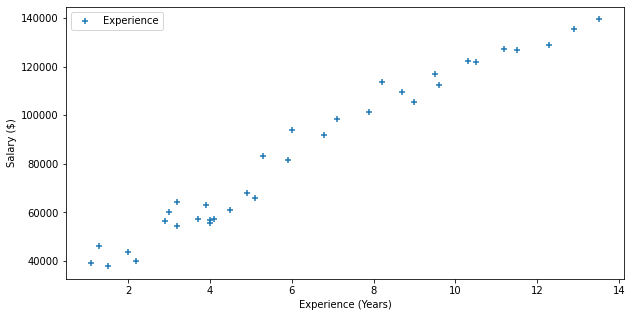

In [39]:
# Let's see what our data looks like
%matplotlib inline

# Set graph size
plt.figure(figsize=(10,5))

# Set axis labels
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')

# Plot data
plt.scatter(df['YearsExperience'], df['Salary'], marker = '+', label = 'Experience')

# Show labels
plt.legend()

There is an obvious uptrend, with the trend being: More experience = High salary

Since there is a consistent trend, we can assume our model will be accurate too.

In [40]:
# Splitting data; train / test - better model implementation practice
x = df['YearsExperience']
y = df['Salary']
x = x.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # 20% = Test, 80% = Train

In [41]:
# Fitting the LR model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Saving this model
joblib.dump(lin_reg, '(4.2) Experience & Salary - Regression Practice - Model')

['(4.2) Experience & Salary - Regression Practice - Model']

In [43]:
# new_model_variable = joblib.load("model_save_name")
ExpSal_model = joblib.load('(4.2) Experience & Salary - Regression Practice - Model')

In [44]:
x_test # This is our 20% test batch

array([[ 6.8],
       [ 2.9],
       [ 8.7],
       [11.5],
       [ 9.6],
       [ 3. ],
       [ 4.1]])

In [45]:
# Automatic prediction
ExpSal_model.predict(x_test) # syntax; reg.predict([[x], [x], [x]]) or reg.predict([[x]]) or reg.predict(x)

array([ 88053.24351365,  53909.50945866, 104687.37036096, 129200.82045172,
       112566.69360442,  54784.98981904,  64415.27378327])

In [46]:
ExpSal_model.predict([[5]])

array([72294.59702673])

Now let's look at getting the point for line of best fit:

y = mx + b

- m = The coefficient, "co" meaning joint - in this case with the variable "x"
- b = The intercept

In [47]:
# Manual prediction - how it works essentially
coefficient = ExpSal_model.coef_ # m
intercept = ExpSal_model.intercept_ # b

print(f"The coefficient is: {coefficient}")
print(f"The intercept is: {intercept}")
(coefficient * x_test) + intercept # Multiply by a random vaiable 

The coefficient is: [8754.80360384]
The intercept is: 28520.579007509616


array([[ 88053.24351365],
       [ 53909.50945866],
       [104687.37036096],
       [129200.82045172],
       [112566.69360442],
       [ 54784.98981904],
       [ 64415.27378327]])

In [49]:
ExpSal_model.score(x_test,y_test) # The score is 97.5% 

0.9750596807525993

The score of the model fluctuates. We have to find a way, where our test data produces the highest correlative score.

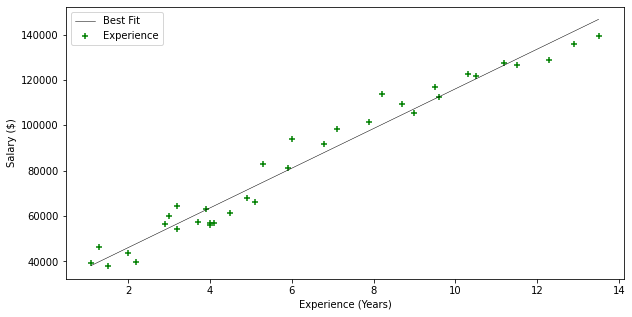

In [50]:
%matplotlib inline

# Set figure size
plt.figure(figsize=(10, 5))

# Assigning labels to axis
plt.xlabel('Experience (Years)') # x axis
plt.ylabel('Salary ($)') # y axis

# Plotting general data - scatter
plt.scatter(df.YearsExperience, df.Salary, color='Green', marker='+', label = 'Experience') 

# Plotting line of best fit - line.
## Syntax; plt.plot(x, reg.predict(x)...) : reg.predict(x) = y = m*x + b
plt.plot(df.YearsExperience, ExpSal_model.predict(x),color='black', label = 'Best Fit', linewidth = 0.5)

# Include labels
plt.legend()